In [1]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
# Fixing random state for reproducibility
np.random.seed(19680801)

num_val = 100

# 100 values randomly between 0 and 10
# x_vals = np.random.uniform(0, 10, num_val).reshape((100,2))
x_vals = np.random.uniform(0, 10, num_val)

# the line 1+2x with normally distributed noise
# y_vals = 2 + 2* x_vals[:,0]+ 3* x_vals[:,1]+  np.random.normal(size=num_val//2) 
y_vals = 2 + 2* x_vals +  np.random.normal(size=num_val) 

https://datascienceplus.com/linear-regression-from-scratch-in-python/

https://mubaris.com/2017/09/28/linear-regression-from-scratch/

You can find the closed form solution to Ordinary Least Squares [here](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) in eq. 12.

You can find the derivation of the Ordinary Least Squares Estimator [here](https://are.berkeley.edu/courses/EEP118/current/derive_ols.pdf)

In [22]:
class Reg_line:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.calc()
    
    def calc_lin_reg(self):
        """ Uses the B_1 and B_0 formulas """
        avg_x = np.mean(self.X)
        avg_y = np.mean(self.Y)

        self.b1 = np.sum((self.X - avg_x) * (self.Y - avg_y)) / np.sum(np.square(self.X - avg_x))
        self.b0 = avg_y  - (self.b1 * avg_x)

    def calc(self):
        """ Uses the closed form solution to Ordinary Least Squares """
        
        # put a column of 1's and this will represent the intersept 
        X = self.pad_d1(self.X)
        self.b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(self.Y)

    def solve(self, X):
        """ Predict the Y values corresponding to each X values
          Returns:
              ( X, Y predictions) """
        # If the number of dimensions is incorrect this will throw an error
        return X, np.sum(self.b * self.pad_d1(X), axis=1)

    @staticmethod
    def pad_d1(X):
        """ Append a column of ones to the beginning of X"""
        
        return np.column_stack((np.ones(X.shape[0]), X))

    def RSS(self, X=None):
        """ Residual Sum of Squares """
        if X = None:
            X = self.X

        solve = self.solve(X)[1]
        return np.sum(np.square(self.Y - solve))

    def RSE(self, X=None):
        """ Residual Standard Error """
        if X = None:
            X = self.X

        return np.sqrt(self.RSS(X=X) / (X.shape[0] - 2))

    def TSS(self):
        """ Total Sum of Squares """
        
        return np.sum(np.square(self.Y - np.average(self.Y)))
    
    def R_squared(self, X=None):
        """ R Squared Statistic"""

        return 1 - (self.RSS(X=X) - self.TSS())

In [25]:
from sklearn.datasets import load_boston

# load the boston data set
boston = load_boston()
line1 = Reg_line(boston.data, boston.target)
line1.calc()
print(f'RSS {line1.RSS()}\nRSE {line1.RSE()}\nTSS {line1.TSS()}\nR^2 {line1.R_squared()}')

RSS 11080.276284149873
RSE 4.688781842543331
TSS 42716.29541501977
R^2 31637.019130869896


In [24]:
from sklearn import linear_model
from sklearn.metrics import r2_score

clf = linear_model.LinearRegression().fit(boston.data, boston.target)
r2_score(boston.target, clf.predict(boston.data))

0.74060774286494269

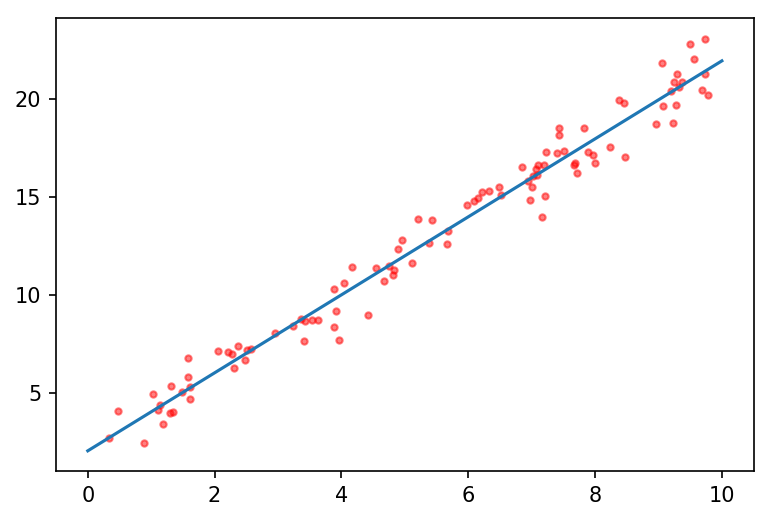

In [10]:
import matplotlib.pyplot as plt
import matplotlib

def gen_graph(X, Y, lines):
    plt.figure(dpi=150)
    plt.scatter(x_vals, y_vals, c="r", alpha=0.5, marker='.',label="Luck")
    for line in lines:
        plt.plot(*line.solve(np.arange(0,11)))

    plt.show()
    
gen_graph(x_vals, y_vals, [Reg_line(x_vals, y_vals)])

In [16]:
solve(calc_lin_reg(x_vals, y_vals), np.arange(0,10))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([  2.02504519,   4.01953034,   6.01401549,   8.00850063,
         10.00298578,  11.99747093,  13.99195607,  15.98644122,
         17.98092637,  19.97541151]))

In [15]:
 np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])